In [13]:
# Solve 16∂u/∂t = ∂²u/∂x², 0<=x<=4, t>0
# with boundary condition u(0,t)= 0, u(4,t)= 8
# and initial condition u(x,0)= 1/2x(8-x) 

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from tabulate import tabulate

In [15]:
L = 4         # Length of the spatial domain
dx = 0.25      # Spatial step size (delta x)
dt = 0.25        # Time step size (delta t)
alpha = 1/16 
time_steps = 5  

T = time_steps * dt
print(f'Total time T = {T:.4f}')

# Stability condition
r = alpha * dt / dx**2
print ('r=', r)
if r > 0.5:
    print("Warning: The scheme may be unstable (r > 0.5).")

Total time T = 1.2500
r= 0.25


In [16]:
Nx = int(L / dx) + 1   
Nt = time_steps + 1   
print('Number of discretization on x:', Nx)
print('Number of discretization on t:', Nt) 

Number of discretization on x: 17
Number of discretization on t: 6


In [17]:
x = np.linspace(0, L, Nx)
t = np.linspace(0, T, Nt)

u = np.zeros((Nt, Nx))  

# Initial condition: 
u[0, :] = 0.5 * x * (8 - x)   #u(x, 0) = 1/2x(8 - x)

# Boundary conditions
u[:, 0] = 0     # u(0, t) = 0
u[:, -1] = 8    # u(4, t) = 8

##Explicit Scheme

In [20]:
# Finite difference method (explicit scheme)
for j in range(Nt - 1):
    for i in range(1, Nx - 1):
        u[j + 1, i] = r * u[j, i - 1] + (1 - 2 * r) * u[j, i] + r * u[j, i + 1]

In [21]:
# Function to print a detailed table
def print_table(u, x, t):
    headers = ["x"] + [f"{x_val:.1f}" for x_val in x]
    table = []
    for j, time_step in enumerate(t):
        row = [f"j={j}(t={time_step})"] + [f"{u[j, i]:.4f}" for i in range(len(x))]
        table.append(row)
    print(tabulate(table, headers=headers, tablefmt="fancy_grid"))

In [22]:
# Display table of results for selected time steps
print_table(u, x, t)

╒═════════════╤═══════╤════════╤════════╤════════╤════════╤════════╤════════╤════════╤════════╤════════╤════════╤════════╤════════╤════════╤════════╤════════╤═══════╕
│ x           │   0.0 │    0.2 │    0.5 │    0.8 │    1.0 │    1.2 │    1.5 │    1.8 │    2.0 │    2.2 │    2.5 │    2.8 │    3.0 │    3.2 │    3.5 │    3.8 │   4.0 │
╞═════════════╪═══════╪════════╪════════╪════════╪════════╪════════╪════════╪════════╪════════╪════════╪════════╪════════╪════════╪════════╪════════╪════════╪═══════╡
│ j=0(t=0.0)  │     0 │ 0.9688 │ 1.875  │ 2.7188 │ 3.5    │ 4.2188 │ 4.875  │ 5.4688 │ 6      │ 6.4688 │ 6.875  │ 7.2188 │ 7.5    │ 7.7188 │ 7.875  │ 7.9688 │     8 │
├─────────────┼───────┼────────┼────────┼────────┼────────┼────────┼────────┼────────┼────────┼────────┼────────┼────────┼────────┼────────┼────────┼────────┼───────┤
│ j=1(t=0.25) │     0 │ 0.9531 │ 1.8594 │ 2.7031 │ 3.4844 │ 4.2031 │ 4.8594 │ 5.4531 │ 5.9844 │ 6.4531 │ 6.8594 │ 7.2031 │ 7.4844 │ 7.7031 │ 7.8594 │ 7.9531 │     8 

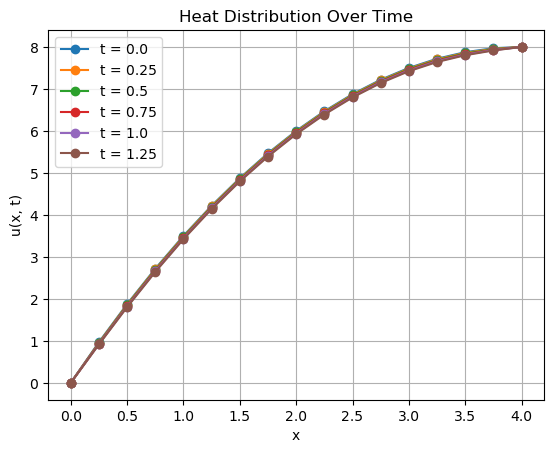

In [23]:
plt.figure()
for j in range(0, Nt, int(Nt/4)):
    plt.plot(x, u[j, :], marker='o', label=f't = {j*dt}')
plt.xlabel('x')
plt.ylabel('u(x, t)')
plt.legend()
plt.title("Heat Distribution Over Time")
plt.grid(True)
plt.show()

Implicit Scheme

In [24]:
# Set up the tridiagonal matrix A for the implicit scheme
A = np.zeros((Nx - 2, Nx - 2))
b = np.zeros(Nx - 2)

In [25]:
# Filling matrix A using r
for i in range(Nx - 2):
    if i > 0:
        A[i, i - 1] = -r
    A[i, i] = 1 + 2 * r
    if i < Nx - 3:
        A[i, i + 1] = -r

# Time-stepping using the implicit method
for n in range(0, Nt - 1):
    # Right-hand side vector
    b[:] = u[n, 1:-1]
    # Adjust for boundary conditions
    b[0] += r * u[n + 1, 0]  # Left boundary
    b[-1] += r * u[n + 1, -1]  # Right boundary

    # Solve the tridiagonal system A * u_next = b
    u[n + 1, 1:-1] = np.linalg.solve(A, b)

In [26]:
# Function to print a detailed table
def print_table(u, x, t):
    headers = ["x"] + [f"{x_val:.1f}" for x_val in x]
    table = []
    step = max(int(Nt / 10), 1)  # Ensure the step size is at least 1
    for n, time_step in enumerate(t[::step]):  # Display every 10th time step or at least every step 1
        row = [f"t = {time_step:.2f}"] + [f"{u[n * step, j]:.4f}" for j in range(len(x))]
        table.append(row)
    print(tabulate(table, headers=headers, tablefmt="fancy_grid")) 

In [27]:
print_table(u, x, t)

╒══════════╤═══════╤════════╤════════╤════════╤════════╤════════╤════════╤════════╤════════╤════════╤════════╤════════╤════════╤════════╤════════╤════════╤═══════╕
│ x        │   0.0 │    0.2 │    0.5 │    0.8 │    1.0 │    1.2 │    1.5 │    1.8 │    2.0 │    2.2 │    2.5 │    2.8 │    3.0 │    3.2 │    3.5 │    3.8 │   4.0 │
╞══════════╪═══════╪════════╪════════╪════════╪════════╪════════╪════════╪════════╪════════╪════════╪════════╪════════╪════════╪════════╪════════╪════════╪═══════╡
│ t = 0.00 │     0 │ 0.9688 │ 1.875  │ 2.7188 │ 3.5    │ 4.2188 │ 4.875  │ 5.4688 │ 6      │ 6.4688 │ 6.875  │ 7.2188 │ 7.5    │ 7.7188 │ 7.875  │ 7.9688 │     8 │
├──────────┼───────┼────────┼────────┼────────┼────────┼────────┼────────┼────────┼────────┼────────┼────────┼────────┼────────┼────────┼────────┼────────┼───────┤
│ t = 0.25 │     0 │ 0.9558 │ 1.8598 │ 2.7032 │ 3.4844 │ 4.2031 │ 4.8594 │ 5.4531 │ 5.9844 │ 6.4531 │ 6.8594 │ 7.2031 │ 7.4844 │ 7.7032 │ 7.8598 │ 7.9558 │     8 │
├──────────┼────

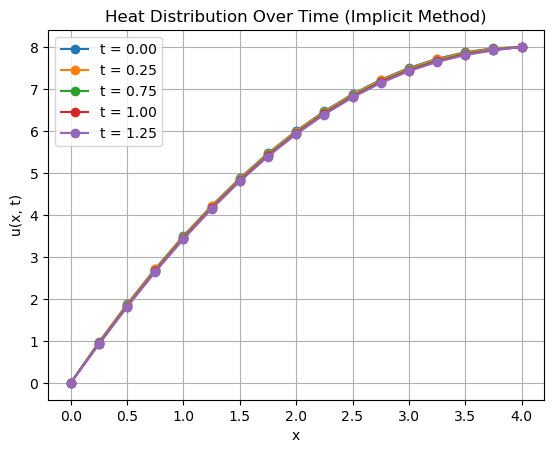

In [28]:
# Plotting the solution with markers
plt.figure()
time_steps_to_plot = [0, int(Nt/4), int(Nt/2), int(3*Nt/4), Nt-1]
for n in time_steps_to_plot:
    plt.plot(x, u[n, :], marker='o', linestyle='-', label=f't = {n * dt:.2f}')
plt.xlabel('x')
plt.ylabel('u(x, t)')
plt.title("Heat Distribution Over Time (Implicit Method)")
plt.legend()
plt.grid(True)
plt.show()